In [98]:
### Chargement des librairies
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)

In [99]:
###Chargement et Affichage
path <- ""
data <- read.table(paste(path, "healthcare_synthetic_data.csv", sep = ""),
                    sep = ",", header = TRUE)

#head(data)

#summary(data)


In [100]:
###transfo des vars qualitatives en quantitatives et suppresion de la colonne Patient_ID
data[, "Heart_Disease_Risk"] <- as.factor(data[, "Heart_Disease_Risk"])
data[, "Gender"] <- as.factor(data[, "Gender"])
data[, "Smoking_Status"] <- as.factor(data[, "Smoking_Status"])
data[, "Alcohol_Consumption"] <- as.factor(data[, "Alcohol_Consumption"])
data[, "Physical_Activity_Level"] <- as.factor(data[, "Physical_Activity_Level"])
data[, "Family_History"] <- as.factor(data[, "Family_History"])
data[, "Sleep_Hours"] <- as.factor(data[, "Sleep_Hours"])  #Sleep_Hours semble qualitative (6 modalités environ)
data[, "Stress_Level"] <- as.factor(data[, "Stress_Level"]) #Stress_Level semble qualitative (10 modalités environ)
data$Patient_ID <- NULL
#summary(data)



In [ ]:
###Création de 2 DataFrame dinstincts pour variables quantitatives et qualitatives  
data_quant <- select(data, where(is.numeric))
data_qual  <- select(data, !where(is.numeric))

summary(data_qual)
summary(data_quant)
###création des colonnes contenant les noms des vars qualitatives et quantitatives
vars_quant <- names(data)[sapply(data, is.numeric)]
vars_qual <- names(data)[sapply(data, function(x) !is.numeric(x))]

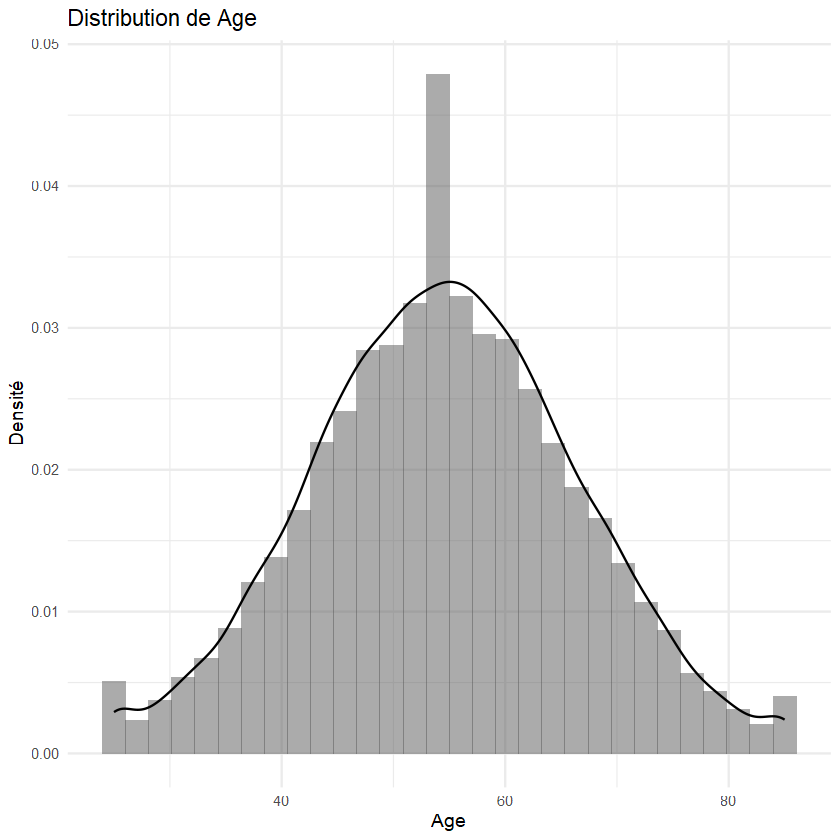

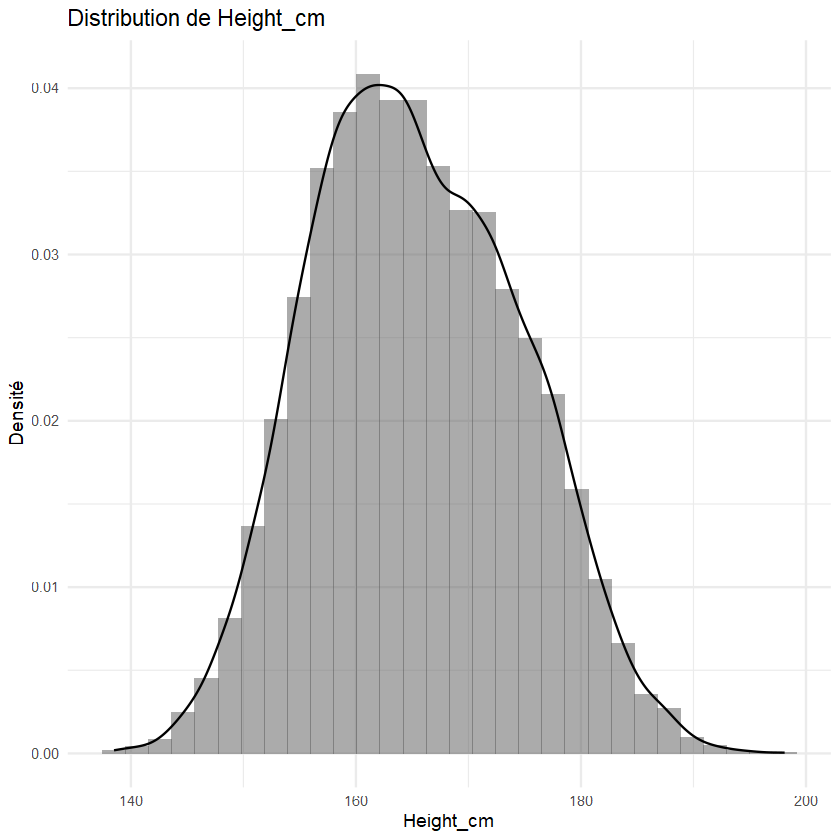

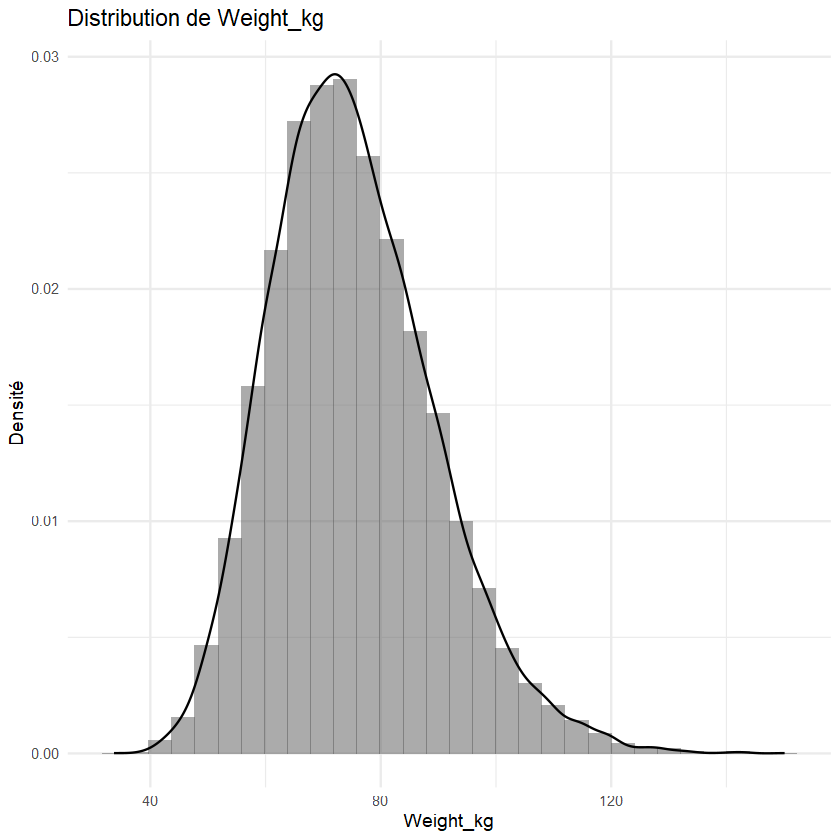

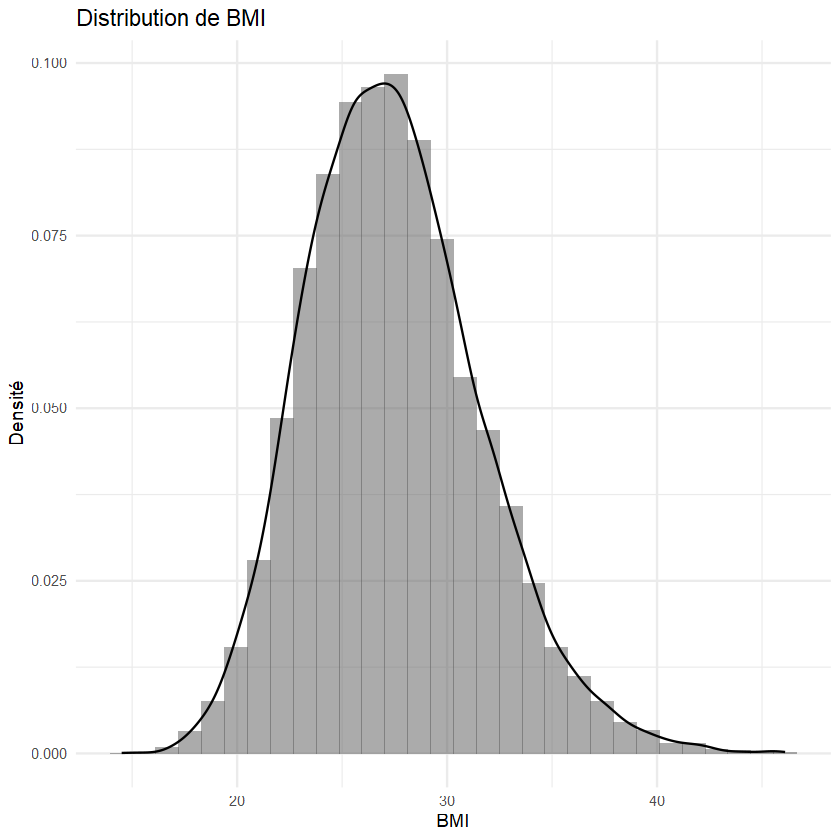

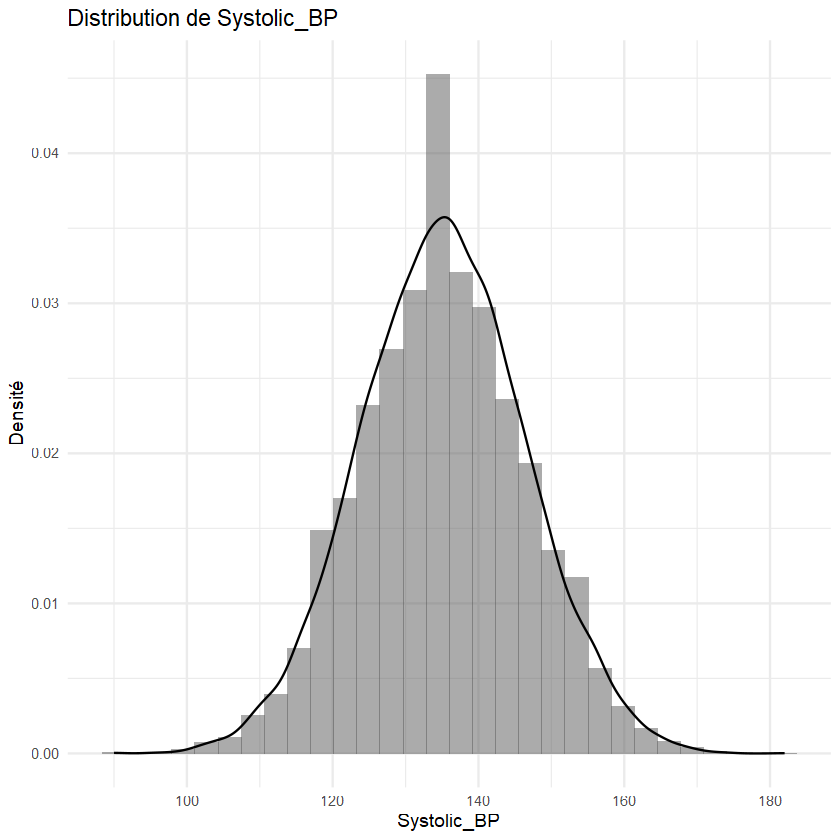

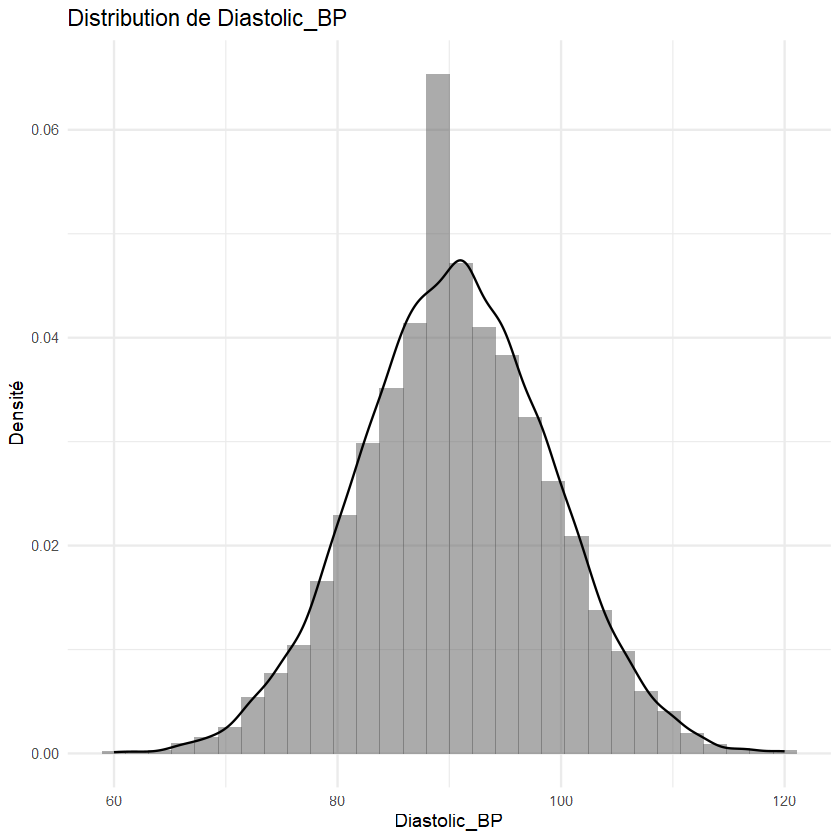

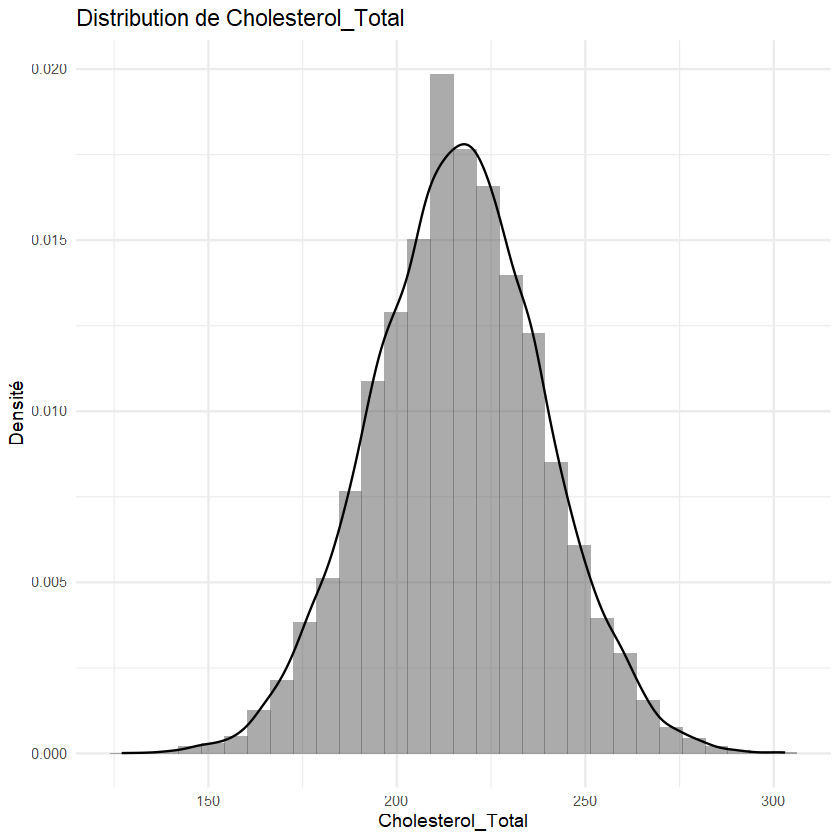

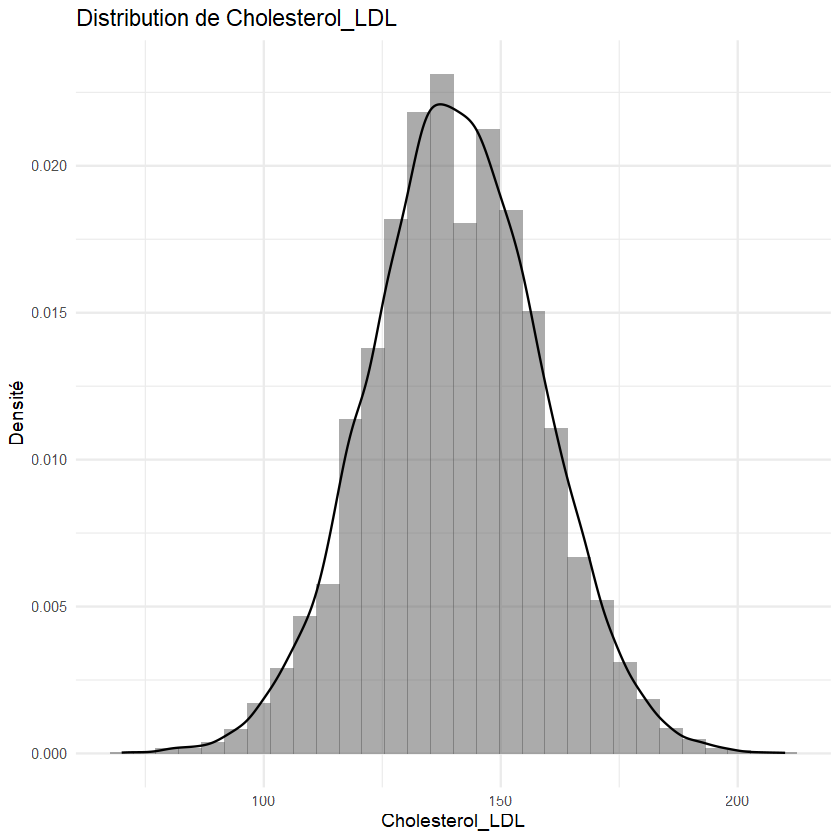

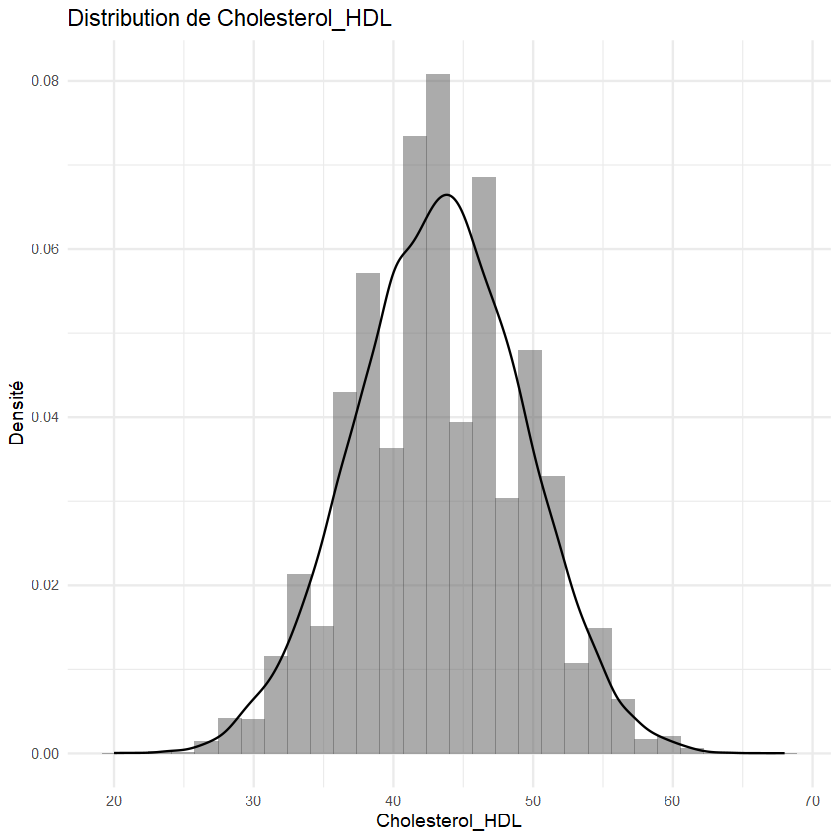

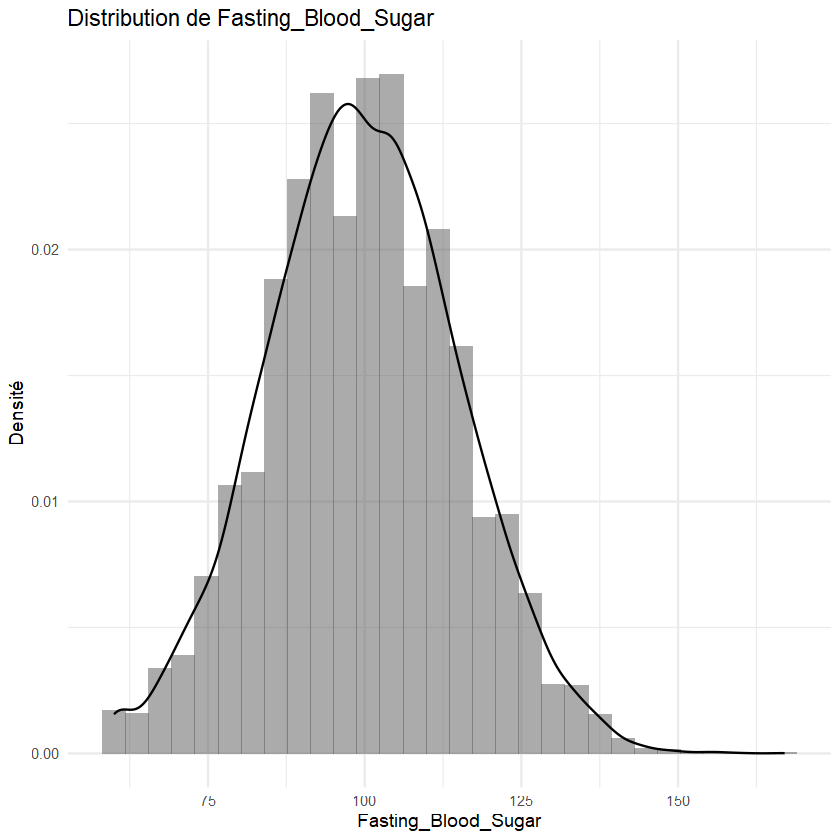

In [103]:
###fonction générant histogramme montrant distribution de Var_X 
histo_compare <- function(var_name) {
    g<-ggplot(data, aes(x = .data[[var_name]])) +
    geom_histogram(aes(y = after_stat(density)), 
                   bins = 30, 
                   alpha = 0.5, 
                   position = "identity") +
    geom_density(alpha = 0.2) +
    theme_minimal() +
    labs(title = paste("Distribution de", var_name),
         x = var_name,
         y = "Densité") 
    return(g)
}
for (v in vars_quant) {
  p <- histo_compare(v)
  print(p) 
}



Transformations pour obtenir des distributions plus symétriques et ainsi plus "gaussiennes".

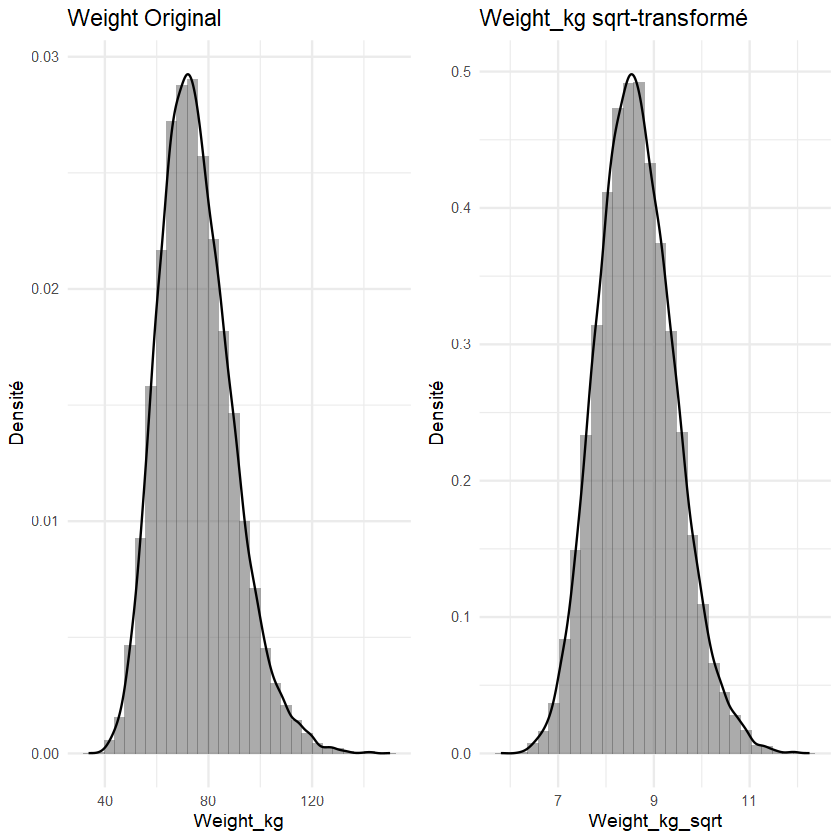

[1] "Age"                      "Gender"                  
 [3] "Height_cm"                "Weight_kg"               
 [5] "BMI"                      "Systolic_BP"             
 [7] "Diastolic_BP"             "Cholesterol_Total"       
 [9] "Cholesterol_LDL"          "Cholesterol_HDL"         
[11] "Fasting_Blood_Sugar"      "Smoking_Status"          
[13] "Alcohol_Consumption"      "Physical_Activity_Level" 
[15] "Family_History"           "Stress_Level"            
[17] "Sleep_Hours"              "Heart_Disease_Risk"      
[19] "Weight_kg_sqrt"           "Fasting_Blood_Sugar_sqrt"

[1] "Age"                      "Gender"                  
 [3] "Height_cm"                "BMI"                     
 [5] "Systolic_BP"              "Diastolic_BP"            
 [7] "Cholesterol_Total"        "Cholesterol_LDL"         
 [9] "Cholesterol_HDL"          "Smoking_Status"          
[11] "Alcohol_Consumption"      "Physical_Activity_Level" 
[13] "Family_History"           "Stress_Level"            
[15] "Sleep_Hours"              "Heart_Disease_Risk"      
[17] "Weight_kg_sqrt"           "Fasting_Blood_Sugar_sqrt"

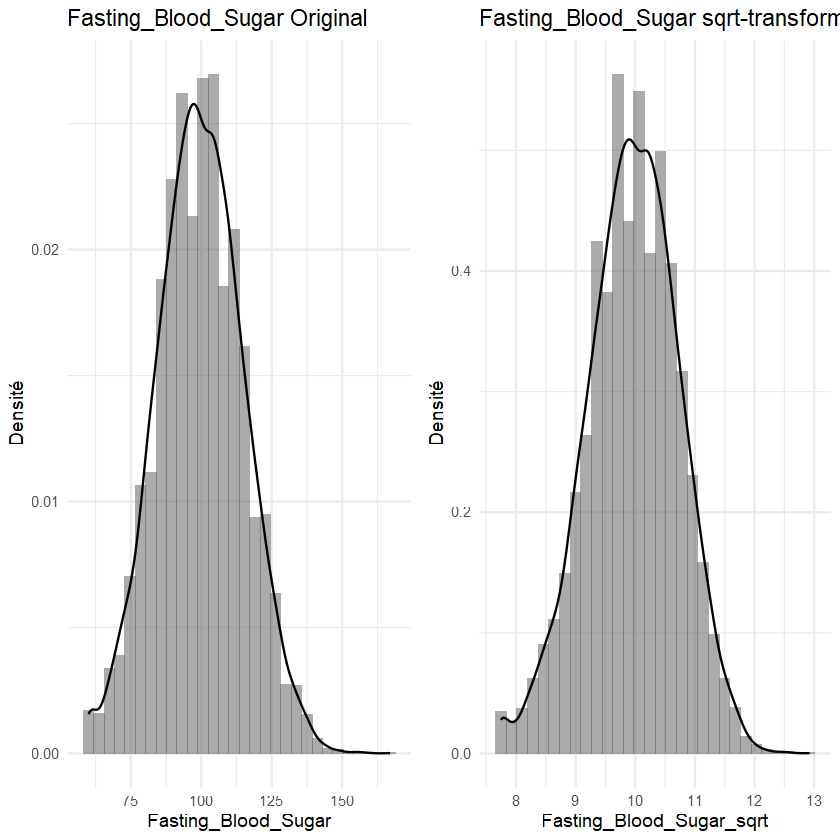

In [ ]:
# Test de transformation 1 
data$Weight_kg_sqrt <- sqrt(data$Weight_kg)

p1 <- histo_compare("Weight_kg") + labs(title = "Weight Original")
p2 <- histo_compare("Weight_kg_sqrt") + labs(title = "Weight_kg sqrt-transformé") 

grid.arrange(p1, p2, ncol = 2)

# Test de transformation 2
data$Fasting_Blood_Sugar_sqrt <- sqrt(data$Fasting_Blood_Sugar)

p1 <- histo_compare("Fasting_Blood_Sugar") + labs(title = "Fasting_Blood_Sugar Original")
p2 <- histo_compare("Fasting_Blood_Sugar_sqrt") + labs(title = "Fasting_Blood_Sugar sqrt-transformé") 

grid.arrange(p1, p2, ncol = 2)
names(data)
data <- data[, c(1:3,5:10,12:20)]
names(data)
###pas sur de l'utilité des transfos



In [ ]:
data_standardisees <- scale(data_quant, center = TRUE, scale = TRUE)

###Création de 2 DataFrame dinstincts pour variables quantitatives et qualitatives  
data_quant <- select(data_standardisees, where(is.numeric))
data_qual  <- select(data_standardisees, !where(is.numeric))

summary(data_qual)
summary(data_quant)
###création des colonnes contenant les noms des vars qualitatives et quantitatives
vars_quant <- names(data)[sapply(data_standardisees, is.numeric)]
vars_qual <- names(data)[sapply(data_standardisees, function(x) !is.numeric(x))]

ggpairs(data_quant)